# Conceptual

__1.__ Describe the null hypotheses to which the _p_-values given in Table 3.4 correspond. Explain what conclusions you can draw on these _p_-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio`, and `newspaper`, rather than in terms of the coefficients of the linear model.

In [1]:
Advertising <- subset(read.csv("../99DataSets/Advertising.csv"), select = -X)
attach(Advertising)

In [9]:
advert.fit <- lm(sales ~ ., data = Advertising)
summary(advert.fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.938889369,0.311908236,9.4222884,1.267295e-17
TV,0.045764645,0.001394897,32.8086244,1.509960e-81
radio,0.188530017,0.008611234,21.8934961,1.505339e-54
newspaper,-0.001037493,0.005871010,-0.1767146,8.599151e-01


__SOLUTION__  
Null hypothesis $H_0: \beta_i = 0$. As can be seen in the table above the _p_-values for `TV`, and `radio` are essentially $0$ and thus we can reject the Null hypothesis and recognize that there is a relationship between these predictors and the response `sales`. The input variable `newspaper`, has a _p_-value of $0.860$ which is significant. This means the Null hypothesis is accepted&mdash;there is no relationship between the input variable `newspaper` and the output variable `sales`.

---

__2.__  Carefully explain the differences between the KNN classifier and KNN regression methods.

__Solution__  
* KNN Classifier attempts to predict the classification of an observation by looking at the classification of its nearest neighbors. The majority classification of the neighbors is the predicted classification of the observation we are trying to predict.
* KNN regression is used to predict the value of a numerical response variable. This method may be good to use when the true relationship between the response and the predictors is not linear. KNN regression is similar to the KNN classifier method in that it predicts the value of the response by looking at the values of the _k_-nearest neighbors based on the values of the predictors. THe response variable values of the neighbors is then averaged, this average is the predicted response value for the observation we are seeking to predict.

---

__3.__  Suppose we have a data set with five predictors, $X_1 =$ GPA, $X_2 =$ IQ, $X_3 =$ Level (1 for College and 0 for High School), $X_4 = $ Interaction between GPA and IQ, $X_5 =$ Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0}=50$, $\hat{\beta_1}=20$, $\hat{\beta_2}=0.07$, $\hat{\beta_3}=35$, $\hat{\beta_4}=0.01$, $\hat{\beta_5}=-10$.  

&nbsp;&nbsp;(a) Which answer is correct, and why?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i.&nbsp;&nbsp;&nbsp;&nbsp;For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii.&nbsp;&nbsp;&nbsp;For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii.&nbsp;&nbsp;For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv.&nbsp;&nbsp;&nbsp;For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.  
&nbsp;&nbsp;(b) Predict the salary of a college graduate with IQ of $110$ and a GPA of $4.0$.  
&nbsp;&nbsp;(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.  

In [27]:
beta.0 <- 50
beta.1 <- 20
beta.2 <- 0.07
beta.3 <- 35
beta.4 <- 0.01
beta.5 <- -10

The equation:
\begin{align}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 \\
\\
X_4 = X_1 * X_2 \\
X_5 = X_1 * X_3 \\
\\
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_1X_2 + \beta_5 X_1X_3 \\
Y &= 50 + 20 * \text{GPA} + 0.07 * \text{IQ} + 35 * \text{Level} + 0.01 * \text{GPA} * \text{IQ} + (-10) * \text{GPA} * \text{Level}
\\
\\
Y &= 85 + 10\text{GPA} \ \ \ \text{College} \\
Y &= 50 + 20\text{GPA} \ \ \ \text{High School}
\end{align}

__SOLUTION__: (iii) As long as the GPA $\ge 3.5$ high school graduates will earn more on average.

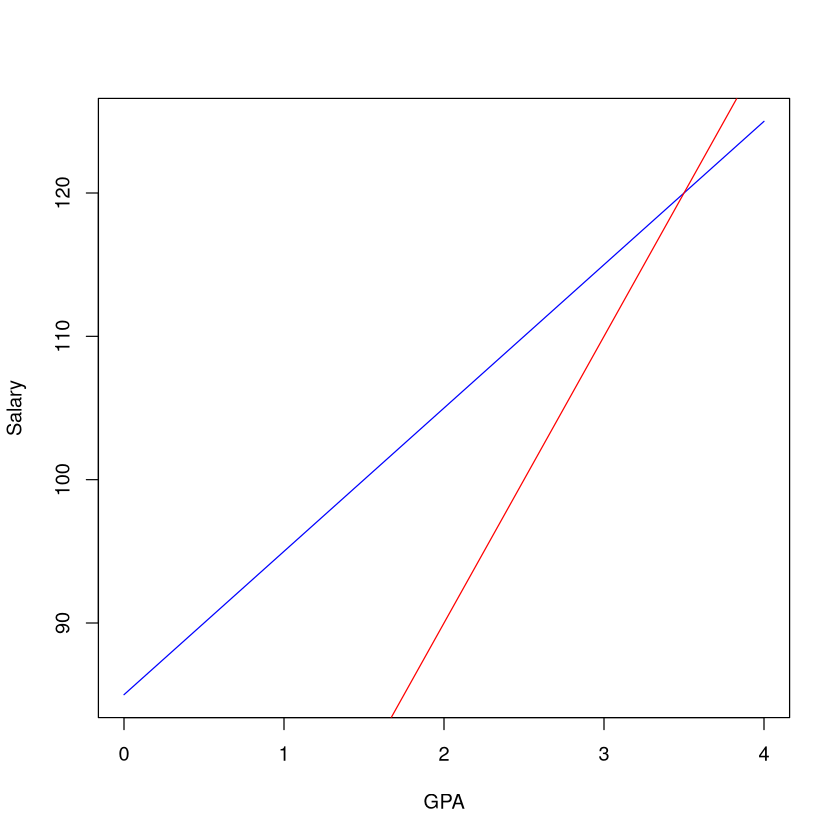

In [28]:
curve(85 + 10*x, 0, 4, ylab="Salary", xlab="GPA", col="blue")
curve(50 + 20*x, 0, 4, col="red", add = TRUE)

For a college graduate ($X_3 = 1$), with an IQ of 110 and GPA of 4.0 ($X_1 = 4.0$, $X_2 = 110$)
\begin{align}
Y = 50 + (20)(4.0) + (0.07)(110) + (35)(1) + (0.01)(4.0)(110) + (-10)(4.0)(1)
\end{align}

In [30]:
50 + 20*4 + .07*110 + 35 + .01*4*110 - 10*4

[1] 137.1

(c) __False__, the _p_-value should be examined for statistical significance.

---

__4.__ I collect a set of data ($n=10$ observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$.

(a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = \beta_0 + \beta_1 X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

__SOLUTION__  
The training RSS for the cubic regression should be lower than the linear regression because the cubic regression is more flexible than the linear regression.

(b) Answer (a) using test rather than training RSS.  

__SOLUTION__  
It would be hard to say. It would depend on the data. It is possible that the test RSS would be worse for the cubic regression because of overfitting.

(c) Suppose that the true relationship between $X$ and $Y$ is not linear, but we don't know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.  

__SOLUTION__  
You would still expect the training RSS for the cubic to be less than the training RSS for the linear regression because it is at least as flexible as the linear regression.

(d) Answer (c) using test rather than training RSS.  

__SOLUTION__  
It would be hard to say. It depends on how non-linear the relationship is.

---

__5.__ Consider the fitted values that result from performing linear regression without an intercept. In this setting, the _i_ th fitted value takes the form
\begin{align}
\hat{y_i} = x_i \hat{\beta}\text{, }
\end{align}
where
\begin{align}\tag{3.38}
\hat{\beta} = \left( \sum^n_{i=1}{x_i y_i} \right) / \left( \sum^n_{i'=1}{x_{i'}^2} \right)\text{.}
\end{align}
Show that we can write
\begin{align}
\hat{y_i} = \sum^n_{i'=1}{a_{i'}y_{i'}}\text{.}
\end{align}
What is $a_{i'}$?  

_Note: We interpret this result by saying that the fitted values from linear regression are_ linear combinations _of the response values_.  

__SOLUTION__  


\begin{align}
\hat{y_i} &= x_i \frac{ \sum^n_{i=1}{x_i y_i} } { \sum^n_{i'=1}{x^2_{i'}}} \\
\\
\hat{y_i} &= x_i \frac{ \sum^n_{i'=1}{ x_{i'} y_{i'} } } { \sum^n_{i''=1} { x^2_{i''} } } \\
\\
\hat{y_i} &= \frac{ \sum^n_{i'=1}{ x_i x_{i'} y_{i'} } } { \sum^n_{i''=1} { x^2_{i''} } } \\
\\
\hat{y_i} &= \frac{ \sum^n_{i'=1}{ x_i x_{i'} } } { \sum^n_{i''=1} { x^2_{i''} } }  y_{i'} \\
\\
\end{align}
where
\begin{align}
a_{i'} = \frac{ \sum^n_{i'=1}{ x_i x_{i'} } } { \sum^n_{i''=1} { x^2_{i''} } }
\end{align}


---

__6.__ Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point $(\bar{x}, \bar{y})$.  

__SOLUTION__  
\begin{align}\tag{3.4}
\hat{\beta_1} &= \frac{ \sum^n_{i=1}(x_i = \bar{x})(y_i - \hat{y}) } { \sum^n_{i=1}(x_i - \bar{x})^2 } \\
\hat{\beta_0} &= \bar{y} - \bar{\beta_1} \hat{x} \text{,}
\end{align}
When $x = \bar{x}$ what is $y$?  

\begin{align}
y &= \hat{\beta_0} + \hat{\beta_1} \bar{x} \\
  &= \bar{y} - \hat{\beta_1} \bar{x} + \hat{\beta_1} \bar{x} \\
  &= \bar{y}
\end{align}

---

__7.__ It is claimed in the text that in the case of simple linear regression of $Y$ onto $X$, the $R^2$ statistic (3.17) is equal to the sqare of the correlation between $X$ and $Y$ (3.18). Prove that this is the case. For simplicity, you may assume that $\bar{x}=\bar{y}=0$.  

__SOLUTION__  
https://danhalligan.github.io/ISLRv2-solutions/linear-regression.html#conceptual-1